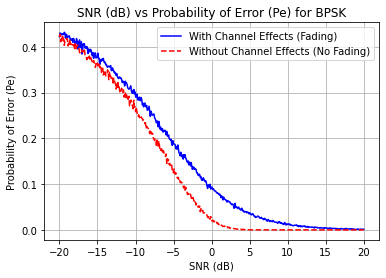

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of symbols and the real number a
K = 10000  # Number of symbols
a = 2  # BPSK amplitude

# Generate BPSK constellation points
x = np.random.choice([-a, a], size=(K, 1))

# Define the range of SNR values in dB from -20 dB to 20 dB
SNR_dB_range = np.linspace(-20, 20, 500)  # 50 values from -20 dB to 20 dB

# Store probabilities of error for both cases: with and without channel effects
Pe_with_channel = []
Pe_without_channel = []

# Loop over different SNR values in dB scale
for SNR_dB in SNR_dB_range:
    # Convert SNR from dB to linear scale
    SNR_linear = 10**(SNR_dB / 10)

    # Calculate the noise variance based on the given SNR formula
    noise_variance = a**2 / (2 * SNR_linear)  # SNR = a^2 / (2 * noise_variance)

    # --- Simulate BPSK with Channel Effects (Fading Channel) ---
    # Simulate fading channel with complex Gaussian noise
    h = np.random.normal(0, np.sqrt(0.5), (K, 1)) + 1j * np.random.normal(0, np.sqrt(0.5), (K, 1))  # CN(0,1)

    # Add noise to received symbol based on the calculated noise variance
    w = np.sqrt(noise_variance / 2) * (np.random.normal(0, 1, (K, 1)) + 1j * np.random.normal(0, 1, (K, 1)))  # CN(0, noise_variance)
    y = h * x + w

    # Coherent detection (after compensating for the fading channel)
    yh = np.conj(h) * y / np.abs(h)

    # Detect the received symbols
    detected_symbols = np.zeros_like(yh)
    for i in range(len(yh)):
        if np.real(yh[i]) > 0:
            detected_symbols[i] = a
        else:
            detected_symbols[i] = -a

    # Probability of error with channel effects
    Pe_channel = np.sum(x != detected_symbols) / len(x)
    Pe_with_channel.append(Pe_channel)

    # --- Simulate Simple BPSK Modulation (Without Channel Effects) ---
    # Add noise to received symbol for simple BPSK modulation
    w_simple = np.sqrt(noise_variance / 2) * (np.random.normal(0, 1, (K, 1)))  # Add noise for simple BPSK (real)
    y_simple = x + w_simple

    # Detect the received symbols (simple BPSK detection)
    detected_symbols_simple = np.zeros_like(y_simple)
    detected_symbols_simple[np.real(y_simple) > 0] = a
    detected_symbols_simple[np.real(y_simple) <= 0] = -a

    # Probability of error for simple BPSK modulation
    Pe_simple = np.sum(x != detected_symbols_simple) / len(x)
    Pe_without_channel.append(Pe_simple)

# Plot SNR in dB vs Probability of Error (Pe) for both cases
plt.plot(SNR_dB_range, Pe_with_channel,linestyle='-', color='b', label="With Channel Effects (Fading)")
plt.plot(SNR_dB_range, Pe_without_channel, linestyle='--', color='r', label="Without Channel Effects (No Fading)")

# Labeling the plot
plt.xlabel('SNR (dB)')
plt.ylabel('Probability of Error (Pe)')
plt.title('SNR (dB) vs Probability of Error (Pe) for BPSK')
plt.grid(True)
plt.legend()
plt.show()
